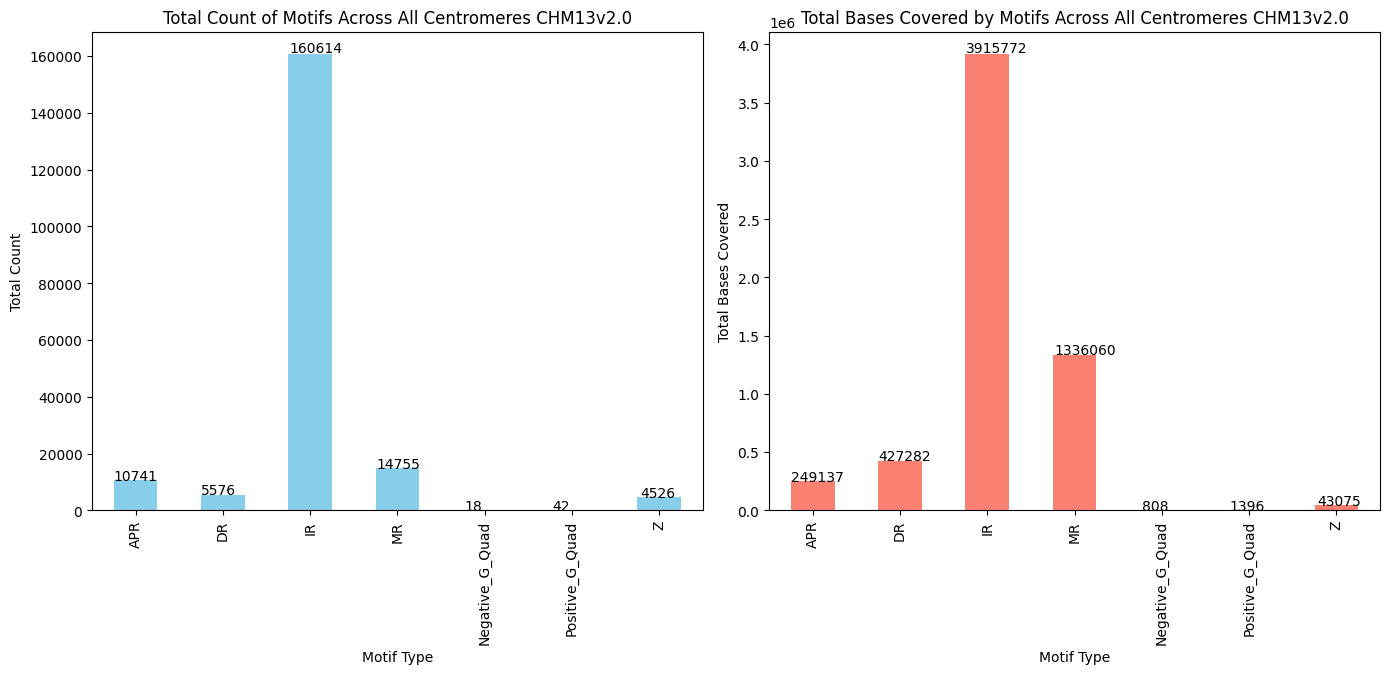

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
quadron_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_quadron_collapsed_summary_metrics_centromeres.csv')
nonb_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_collapsed_summary_metrics_centromere.csv')

# Ensure column names match between the two dataframes
quadron_df = quadron_df.rename(columns={"Total Base Coverage": "Total Bases Covered"})
nonb_df = nonb_df.rename(columns={"Sample_Haplotype_Chromosome": "Sample_Haplotype"})

# Concatenate the dataframes
combined_df = pd.concat([quadron_df, nonb_df], ignore_index=True)

# Plot total count of motifs
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
count_plot = combined_df.groupby('Motif Type')['Total Count'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Count of Motifs Across All Centromeres CHM13v2.0')
plt.xlabel('Motif Type')
plt.ylabel('Total Count')
for p in count_plot.patches:
    count_plot.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# Plot total bases covered
plt.subplot(1, 2, 2)
coverage_plot = combined_df.groupby('Motif Type')['Total Bases Covered'].sum().plot(kind='bar', color='salmon')
plt.title('Total Bases Covered by Motifs Across All Centromeres CHM13v2.0')
plt.xlabel('Motif Type')
plt.ylabel('Total Bases Covered')
for p in coverage_plot.patches:
    coverage_plot.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

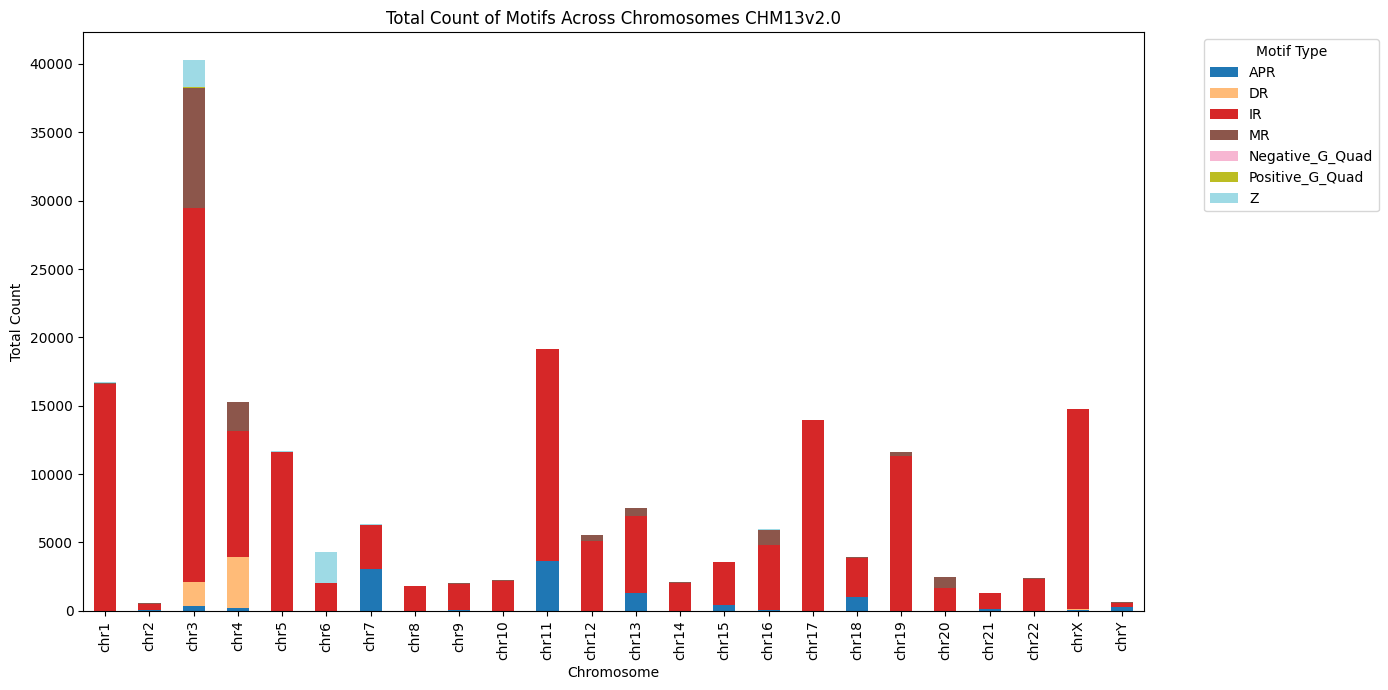

<Figure size 2000x1000 with 0 Axes>

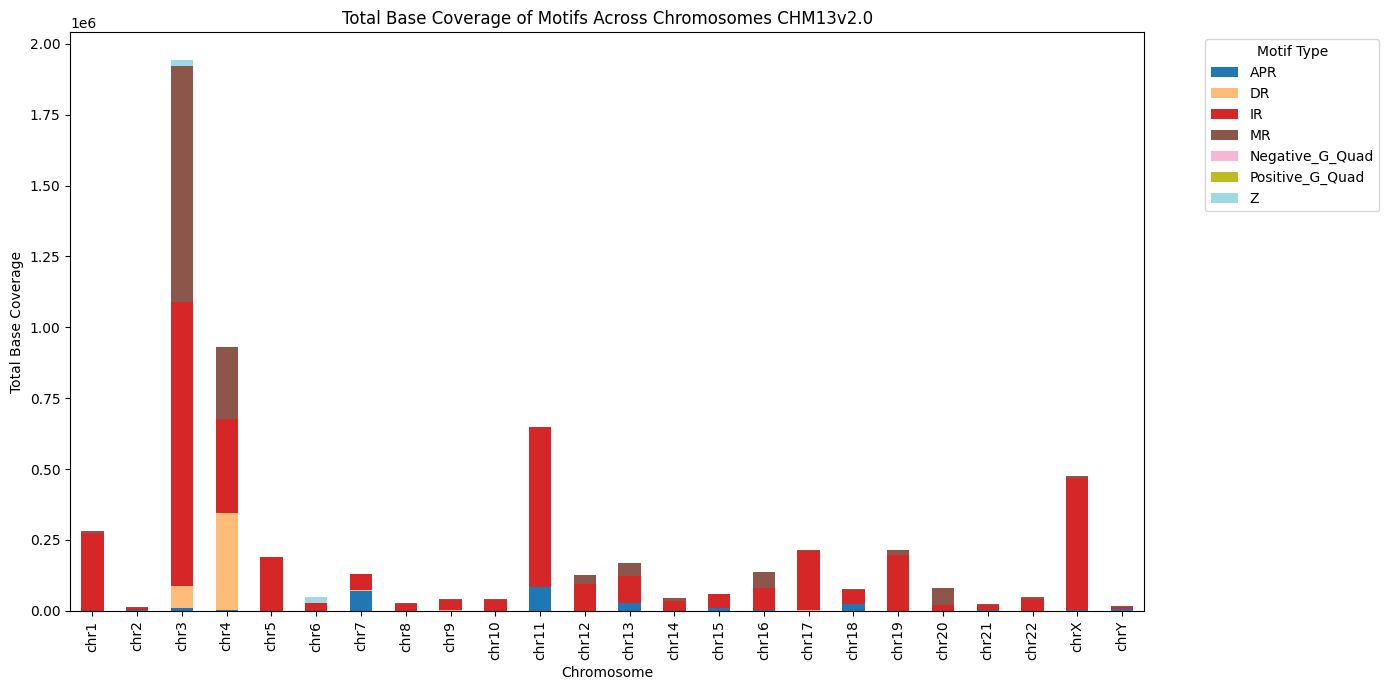

<Figure size 2000x1000 with 0 Axes>

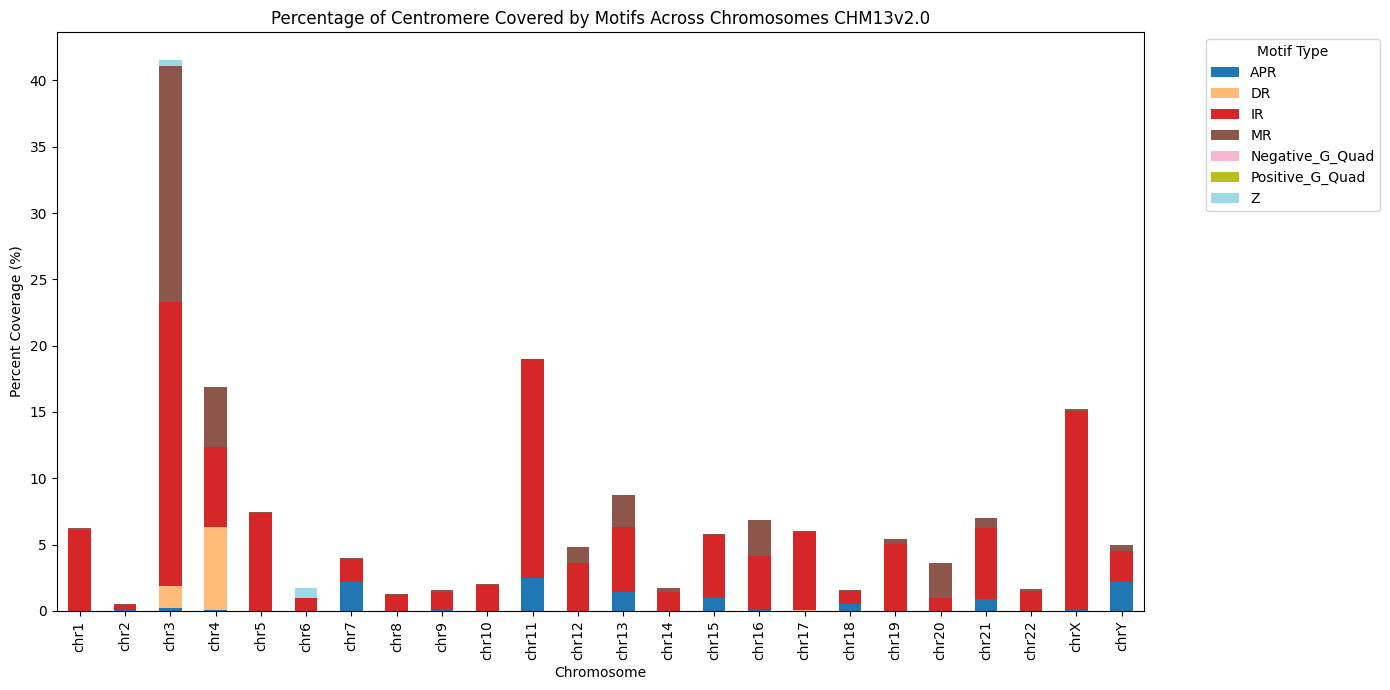

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
quadron_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_quadron_collapsed_summary_metrics_centromeres.csv')
nonb_df = pd.read_csv('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/centromere_summary_stats/chm13_collapsed_summary_metrics_centromere.csv')

# Ensure column names match between the two dataframes
quadron_df = quadron_df.rename(columns={"Total Base Coverage": "Total Bases Covered"})
nonb_df = nonb_df.rename(columns={"Sample_Haplotype_Chromosome": "Sample_Haplotype"})

# Extract chromosome information
quadron_df['Chromosome'] = quadron_df['Sample_Haplotype'].str.extract(r'(chr[0-9XY]+)')
nonb_df['Chromosome'] = nonb_df['Sample_Haplotype'].str.extract(r'(chr[0-9XY]+)')

# Concatenate the dataframes
combined_df = pd.concat([quadron_df, nonb_df], ignore_index=True)

# Add centromere lengths to the dataframe
centromere_lengths = {
    'chr1': 4.504439,
    'chr2': 2.33948,
    'chr3': 4.677024,
    'chr4': 5.494641,
    'chr5': 2.557491,
    'chr6': 2.771684,
    'chr7': 3.300127,
    'chr8': 2.109248,
    'chr9': 2.63082,
    'chr10': 2.030796,
    'chr11': 3.415049,
    'chr12': 2.581652,
    'chr13': 1.950698,
    'chr14': 2.616299,
    'chr15': 1.015672,
    'chr16': 1.981235,
    'chr17': 3.59452,
    'chr18': 4.967851,
    'chr19': 3.950495,
    'chr20': 2.173803,
    'chr21': 0.343352,
    'chr22': 2.922885,
    'chrX': 3.106918,
    'chrY': 0.317335
}

combined_df['Centromere Length (Mb)'] = combined_df['Chromosome'].map(centromere_lengths)

# Calculate percentage of centromere covered by motifs
combined_df['Percent Coverage'] = (combined_df['Total Bases Covered'] / (combined_df['Centromere Length (Mb)'] * 1e6)) * 100

# Define chromosome order
chromosome_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']
combined_df['Chromosome'] = pd.Categorical(combined_df['Chromosome'], categories=chromosome_order, ordered=True)

# Plot total count of motifs across different chromosomes
plt.figure(figsize=(20, 10))

count_plot = combined_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Total Count'].sum().unstack().plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Total Count of Motifs Across Chromosomes CHM13v2.0')
plt.xlabel('Chromosome')
plt.ylabel('Total Count')
plt.legend(title='Motif Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Plot total base coverage of motifs across different chromosomes
plt.figure(figsize=(20, 10))

coverage_plot = combined_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Total Bases Covered'].sum().unstack().plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Total Base Coverage of Motifs Across Chromosomes CHM13v2.0')
plt.xlabel('Chromosome')
plt.ylabel('Total Base Coverage')
plt.legend(title='Motif Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Plot percentage of centromere covered by motifs across different chromosomes
plt.figure(figsize=(20, 10))

percent_plot = combined_df.groupby(['Chromosome', 'Motif Type'], observed=False)['Percent Coverage'].sum().unstack().plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Percentage of Centromere Covered by Motifs Across Chromosomes CHM13v2.0')
plt.xlabel('Chromosome')
plt.ylabel('Percent Coverage (%)')
plt.legend(title='Motif Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
